## ML Project - Loan Approval Prediction By Multiple ML Models
### Models use : Logistic Regression, Decision Tree Classifier, Random Forest Classifier, KNeighbors Classifers

In [1]:
# Importing The Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading the dataset
data = pd.read_csv('Loan_Data.csv')

In [3]:
data.head()           # Getting the first 5 rows of the datasets 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
a = data.shape                  # getting the count of the rows and columns in datasets
shape = a
print(f"Total Numbers of rows in datasets are : {a[0]} \nTotal numbers of columns in datasets are : {a[1]}")

Total Numbers of rows in datasets are : 614 
Total numbers of columns in datasets are : 13


In [5]:
c = data.columns             # Getting the columns names of the datasets
print(f"The columns in the datasets are :\n\n{c}")

The columns in the datasets are :

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [6]:
data.describe()       

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.info()                 # checking the datatypes and other features of the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
data.isnull().sum()        # checking for the null values in each columns 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# filling the null values that are present in each columns 
'''for filling the values of object datatype column we mainly use mode
While filling the null values for the numerical datatype column we must check for the is there is any outlier present in the 
column or not if yes then we go with the median,and if no then we simply use mean value'''

'for filling the values of object datatype column we mainly use mode\nWhile filling the null values for the numerical datatype column we must check for the is there is any outlier present in the \ncolumn or not if yes then we go with the median,and if no then we simply use mean value'

<Axes: >

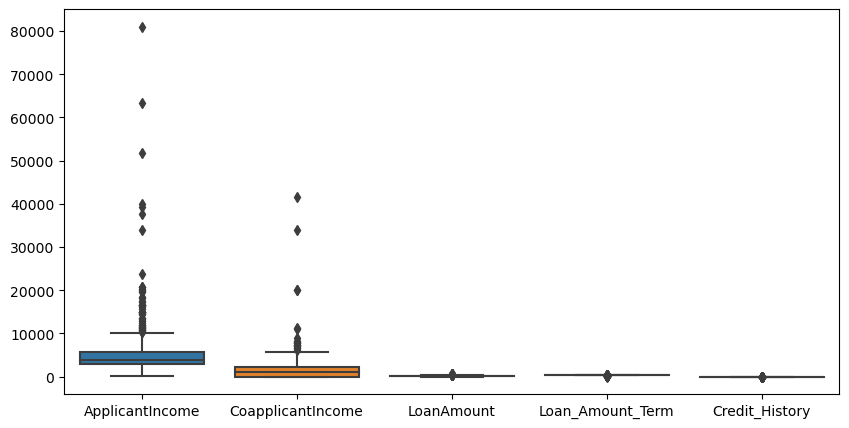

In [10]:
# checking the outliers(outliers are those values that are different from the remaining values in column)

plt.figure(figsize=(10,5))
sns.boxplot(data)

In [11]:
'''Like from the above visualzation we can easily get that "ApplicantIncome" and "Coapplicantincome" Has more outliers as 
compare to others'''
'''For handing the null or missing values in the AplicantIncome and CoapplicantIncome We use "median" '''

'For handing the null or missing values in the AplicantIncome and CoapplicantIncome We use "median" '

In [12]:
# Handling the null or missing values of the numerical datatype columns
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

In [13]:
# Handling the null or missing values of the Object datatype columns
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [14]:
data.isnull().sum()            # checking the null and missing values after the filling the null or missing values 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Number of people who took loan by gender: 
Gender
Male      502
Female    112
Name: count, dtype: int64


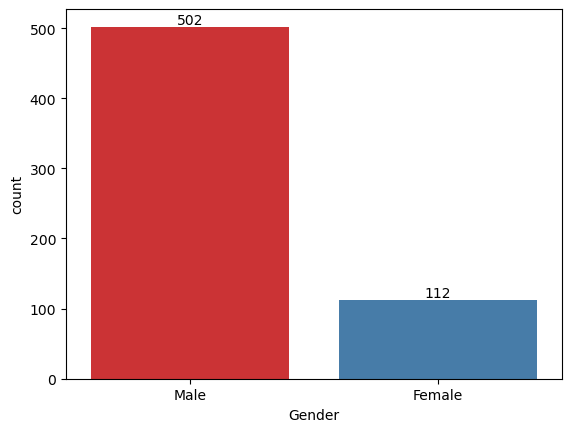

In [15]:
# Now "TIME TO VISUALIZE SOME FEATURES"
# visualization of the Gender Feature which helps to analyze the loan applications by particular gender
print("Number of people who took loan by gender: ")
print(data['Gender'].value_counts())    # Value_counts() will return the count values for male and female application for loan
sns.countplot(x='Gender',data=data,palette='Set1')

# count values display on the top of the bars
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()),
             ha='center', va='bottom')

Number of loan applications by the married status are : 
Married-yes : 401 
 Married-no : 213


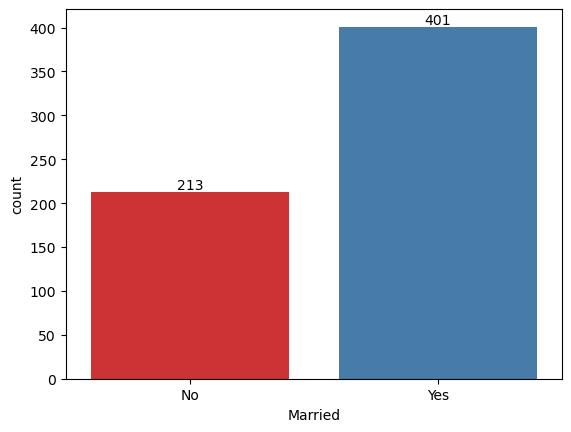

In [16]:
# visualization of the married status Feature which helps to analyze the loan applications
print("Number of loan applications by the married status are : ")
m = data['Married'].value_counts()
yes_count = m.get('Yes', 0)  # Default to 0 if 'Yes' is not in the data
no_count = m.get('No', 0)   # Default to 0 if 'No' is not in the data
print(f"Married-yes : {yes_count} \n Married-no : {no_count}")
sns.countplot(x='Married',data=data,palette='Set1')


# count values display on the top of the bars
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()),
             ha='center', va='bottom')

In [17]:
# Now , we can check for corelation between the features of the datasets 
# For Finding the Correlation The Function use is data.corr()
# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Getting the correlation matrix
co_relation = numerical_data.corr()
co_relation

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


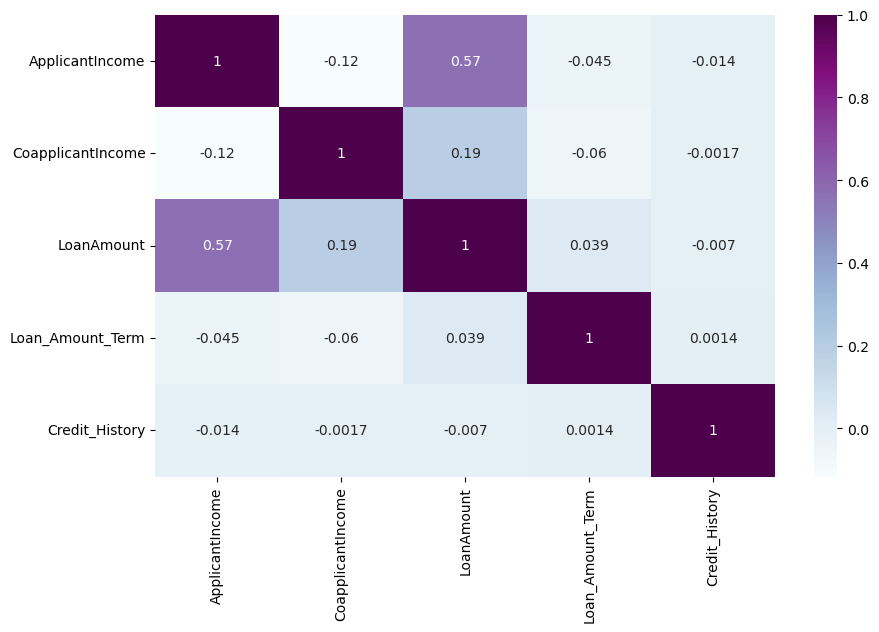

In [18]:
# visualization of the Co_relation
plt.figure(figsize=(10, 6))
sns.heatmap(co_relation, annot=True, cmap='BuPu')
plt.show()

In [19]:
# Featuring Engineering which includes : 
'''checking the Features of the datasets(adding new features if required), 
LabelEncoding, OnehotEncoding to convert the categorical values or datatype into numerical'''

'checking the Features of the datasets(adding new features if required), \nLabelEncoding, OnehotEncoding to convert the categorical values or datatype into numerical'

In [20]:
# adding the new feature 
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [21]:
# checking the value of the numeric features like in applicantincome we can see the 
# there are many changes in the values means they are very skewed so we can apply logarithmic function 
# in the numeric features  so that they can follow the normal distributions

In [22]:
# Appling the "Log Transformation" (normalization)
data['NewApplicantIncome'] = np.log(data['ApplicantIncome']+1)

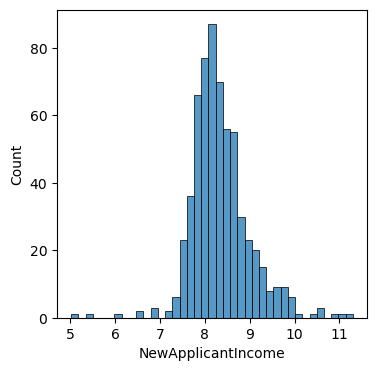

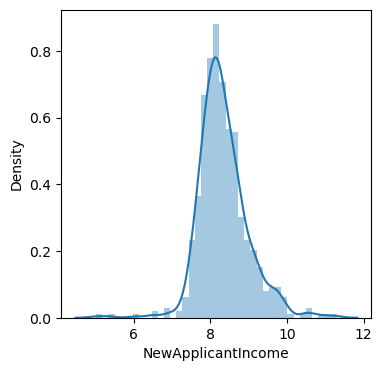

In [23]:
# Now we can visualize the distribution after appling log transformation
plt.figure(figsize=(4, 4))
sns.histplot(data['NewApplicantIncome'])
plt.show()
plt.figure(figsize=(4, 4))
sns.distplot(data['NewApplicantIncome'])
plt.show()

In [24]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,NewApplicantIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681


In [25]:
# Next,Dropping the unwanted columns as we have created new columns or features 
'''like we have created new feature "TotalIncome" so we can drop the "CoapplicantIncome"
like this we can created a new feature for loanAmount and Loan_amount_Term and perform transformation on it 
and drop the unwanted fetaures'''


'like we have created new feature "TotalIncome" so we can drop the "CoapplicantIncome"\nlike this we can created a new feature for loanAmount and Loan_amount_Term and perform transformation on it \nand drop the unwanted fetaures'

In [26]:
# Creating new feature for usin LoanAmount and Loan_Amount_Term
data['TotalLoanAmount'] = data['LoanAmount'] + data['Loan_Amount_Term']

In [27]:
# Appling the "Log Transformation" (normalization)
data['NewLoanAmount'] = np.log(data['LoanAmount']+1)             # normalization for LoanAmount
data['NewLoan_Amount_Term'] = np.log(data['Loan_Amount_Term']+1) # normalization for Loan_Amount_Term

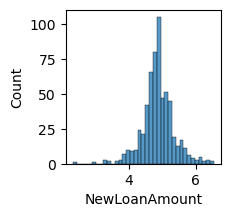

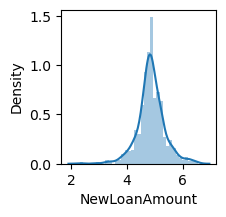

In [28]:
# Now we can visualize the distribution after appling log transformation
#visualization for LoanAmount
plt.figure(figsize=(2, 2))
sns.histplot(data['NewLoanAmount'])
plt.show()
plt.figure(figsize=(2, 2))
sns.distplot(data['NewLoanAmount'])
plt.show()

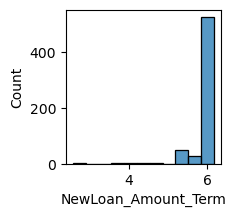

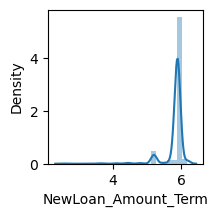

In [29]:
# visualizations for Loan_Amount_Term
plt.figure(figsize=(2, 2))
sns.histplot(data['NewLoan_Amount_Term'])
plt.show()
plt.figure(figsize=(2, 2))
sns.distplot(data['NewLoan_Amount_Term'])
plt.show()

In [30]:
data['NewTotalIncome'] = np.log(data['TotalIncome']+1)

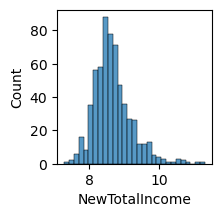

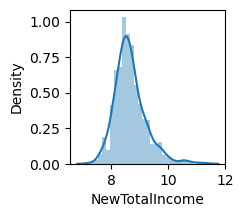

In [31]:
# visualizations for created new feature
plt.figure(figsize=(2, 2))
sns.histplot(data['NewTotalIncome'])
plt.show()
plt.figure(figsize=(2, 2))
sns.distplot(data['NewTotalIncome'])
plt.show()

In [32]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,NewApplicantIncome,TotalLoanAmount,NewLoanAmount,NewLoan_Amount_Term,NewTotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,488.0,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,488.0,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,426.0,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,480.0,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,501.0,4.955827,5.888878,8.699681


In [33]:
# After Normalization and creating the new feature drop the unwanted columns
cols = ['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Loan_ID','TotalIncome']
data = data.drop(columns = cols, axis = 1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,NewApplicantIncome,TotalLoanAmount,NewLoanAmount,NewLoan_Amount_Term,NewTotalIncome
0,Male,No,0,Graduate,No,128.0,1.0,Urban,Y,8.674197,488.0,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,128.0,1.0,Rural,N,8.430327,488.0,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,66.0,1.0,Urban,Y,8.006701,426.0,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,120.0,1.0,Urban,Y,7.857094,480.0,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,141.0,1.0,Urban,Y,8.699681,501.0,4.955827,5.888878,8.699681


In [34]:
# After normalization time to Convert the Catgorical data of datasets to numerical datatype 
'''So for performing this conversion we have two techniques which are "LabelEncoding and  OneHot-Encoding" 
LabelEncoding : This technique is used when we have one or more conditions like gender(male,female), education(graduate,non-graduate),
self_employed(yes,no) then we use LabelEncoding
OneHotEncoding : This technique we can use when we have multiple categorical values like name of cities name of states which
hold importance for each and every categorical value in that column'''

'So for performing this conversion we have two techniques which are "LabelEncoding and  OneHot-Encoding" \nLabelEncoding : This technique is used when we have one or more conditions like gender(male,female), education(graduate,non-graduate),\nself_employed(yes,no) then we use LabelEncoding\nOneHotEncoding : This technique we can use when we have multiple categorical values like name of cities name of states which\nhold importance for each and every categorical value in that column'

In [35]:
# create a list of columns whose datatype we have to convert 
cols_name = ['Gender','Married','Education','Dependents','Property_Area','Self_Employed','Loan_Status']
label_encoder = LabelEncoder()

In [36]:
for col in cols_name:
    data[col] = label_encoder.fit_transform(data[col])

In [37]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,NewApplicantIncome,TotalLoanAmount,NewLoanAmount,NewLoan_Amount_Term,NewTotalIncome
0,1,0,0,0,0,128.0,1.0,2,1,8.674197,488.0,4.859812,5.888878,8.674197
1,1,1,1,0,0,128.0,1.0,0,0,8.430327,488.0,4.859812,5.888878,8.714732
2,1,1,0,0,1,66.0,1.0,2,1,8.006701,426.0,4.204693,5.888878,8.006701
3,1,1,0,1,0,120.0,1.0,2,1,7.857094,480.0,4.795791,5.888878,8.505525
4,1,0,0,0,0,141.0,1.0,2,1,8.699681,501.0,4.955827,5.888878,8.699681


In [38]:
data.dtypes     # we can see that all the features/ columns are converted into the numerical datatypes

Gender                   int32
Married                  int32
Dependents               int32
Education                int32
Self_Employed            int32
LoanAmount             float64
Credit_History         float64
Property_Area            int32
Loan_Status              int32
NewApplicantIncome     float64
TotalLoanAmount        float64
NewLoanAmount          float64
NewLoan_Amount_Term    float64
NewTotalIncome         float64
dtype: object

In [39]:
# Now, after this we have to create/split a dependent and independent variable 
x = data.drop(columns= ['Loan_Status'],axis=1)
y = data['Loan_Status']

In [40]:
# Creating a Machine Learning Model
# importing the required Libraries for creating ML model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier     # it will do both classification as well as regression task but here we have to do classification so we import classifier
from sklearn.ensemble import RandomForestClassifier    # randomForestclassifer is type of ML model in which multiple decisiontreeclassifier are train and avg of all is expected result
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# spliting into train ,test, split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 32)

In [42]:
# Model1
# Logestics regression()

In [43]:
Model_1 = LogisticRegression()    # calling the imported model Logisticregression
Model_1.fit(x_train,y_train)      # fitting the model to the training data or train our model on training data
y1_pred = Model_1.predict(x_test)       # y_pred store the predicted values based on testing data x_test
accuracy = accuracy_score(y_test,y1_pred) # checking the accuracy on original testing data and y_pred 
print(f"The accuracy score for Logistic Regression Model is : {round(accuracy*100,2)}")

The accuracy score for Logistic Regression Model is : 81.17


In [44]:
# Model2
# DecisionTreeClassifier()

In [45]:
Model_2 = DecisionTreeClassifier()         # calling the imported model DecisionTreeClassifier()
Model_2.fit(x_train,y_train)               # fitting the model to the training data or train our model on training data
y2_pred = Model_2.predict(x_test)           # y_pred store the predicted values based on testing data x_test
accuracy = accuracy_score(y_test,y2_pred)   # checking the accuracy on original testing data and y_pred 
print(f"The accuracy score for DecisionTreeClassifier Model is : {round(accuracy*100,2)}")

The accuracy score for DecisionTreeClassifier Model is : 73.38


In [46]:
# Model3
# RandomForestClassifier() 

In [47]:
Model_3 = RandomForestClassifier()         # calling the imported model randomForestClassifier() 
Model_3.fit(x_train,y_train)               # fitting the model to the training data or train our model on training data
y3_pred = Model_3.predict(x_test)           # y_pred store the predicted values based on testing data x_test
accuracy = accuracy_score(y_test,y3_pred)   # checking the accuracy on original testing data and y_pred 
print(f"The accuracy score for RandomForestClassifier  Model is : {round(accuracy*100,2)}")

The accuracy score for RandomForestClassifier  Model is : 79.87


In [48]:
# Model4
# KNeighborsClassifier()

In [49]:
Model_4 = KNeighborsClassifier(n_neighbors=10)           # calling the imported model KNeighborsClassifier()
Model_4.fit(x_train,y_train)               # fitting the model to the training data or train our model on training data
y4_pred = Model_4.predict(x_test)           # y_pred store the predicted values based on testing data x_test
accuracy = accuracy_score(y_test,y4_pred)   # checking the accuracy on original testing data and y_pred 
print(f"The accuracy score for  KNeighborsClassifier()  Model is : {round(accuracy*100,2)}")

The accuracy score for  KNeighborsClassifier()  Model is : 62.99


In [50]:
# Checking the precsion reacll and F1 score by classification report
from sklearn.metrics import classification_report

In [51]:
# creating a function to computation
def generate_classification_report(model_name,y_pred,y_test):
    report = classification_report(y_pred,y_test)
    print(f"Classification Report For The Model : {model_name} : \n {report}\n")
    
generate_classification_report(Model_1,y_test,y1_pred)
generate_classification_report(Model_2,y_test,y2_pred)
generate_classification_report(Model_3,y_test,y3_pred)
generate_classification_report(Model_4,y_test,y4_pred)

Classification Report For The Model : LogisticRegression() : 
               precision    recall  f1-score   support

           0       0.88      0.45      0.59        47
           1       0.80      0.97      0.88       107

    accuracy                           0.81       154
   macro avg       0.84      0.71      0.73       154
weighted avg       0.82      0.81      0.79       154


Classification Report For The Model : DecisionTreeClassifier() : 
               precision    recall  f1-score   support

           0       0.57      0.55      0.56        47
           1       0.81      0.81      0.81       107

    accuracy                           0.73       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.73      0.73      0.73       154


Classification Report For The Model : RandomForestClassifier() : 
               precision    recall  f1-score   support

           0       0.75      0.51      0.61        47
           1       0.81      0.93     